In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

digits = load_digits()
data   = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

scaler  = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

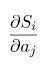   
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/   
derivative of a softmax vector function is a vector of partial derivatives of its components.   
"In ML literature, the term "gradient" is commonly used to stand in for the derivative. Strictly speaking, gradients are only defined for scalar functions (such as loss functions in ML); for vector functions like softmax it's imprecise to talk about a 'gradient'"  
   
https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function

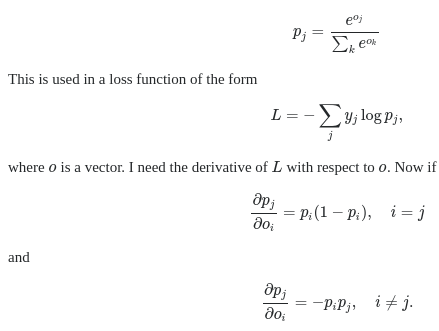

$$softmax'(x) = softmax(x)*(1 - softmax(x))$$

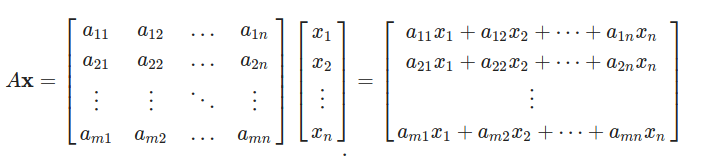  
W*x - is a dot-product, between "W" matrix and "x" vector

In [2]:
import sys
sys.path.append("./py")
import rf_multilayer_dense_numpy as rf_multilayer

#----------------
# LAYERS
layers_specs_lst = [
    (20, "sigmoid"),
]
for i in range(0, 3):
    layers_specs_lst.append((20, "sigmoid"))
layers_specs_lst.append((10, "softmax"))
    
#----------------

model = rf_multilayer.model__create(layers_specs_lst, p_input_dim_int=64)

model forward pass:
y: [0.09505525 0.08465651 0.12572984 0.09543788 0.09101245 0.09324995
 0.077219   0.11255648 0.11468755 0.1103951 ]
y sum: 1.0


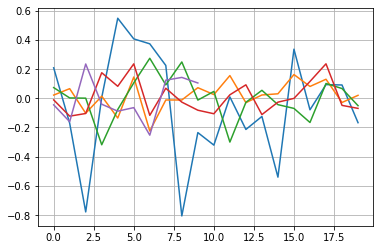

In [4]:
import sys
sys.path.append("./py")
import rf_multilayer_dense_numpy as rf_multilayer

#----------------
# LAYERS
layers_specs_lst = [
    (20, "sigmoid"),
]
for i in range(0, 3):
    layers_specs_lst.append((20, "sigmoid"))
layers_specs_lst.append((10, "softmax"))
    
#----------------
    
# MODEL_CREATE
model = rf_multilayer.model__create(layers_specs_lst, p_input_dim_int=64)

# INPUT
x_input = X_test[0]

# MODEL_FORWARD
y, layers_data_map = rf_multilayer.model__forward(x_input, model, p_print_shapes_bool=False)

print("model forward pass:")
print("y:", y)
print("y sum:", sum(y))




import matplotlib.pyplot as plt
plt.grid(True)

z__layers_out_lst = layers_data_map["z__layers_out_lst"]
for z in z__layers_out_lst:
    plt.plot(range(0,len(z)), z)
        

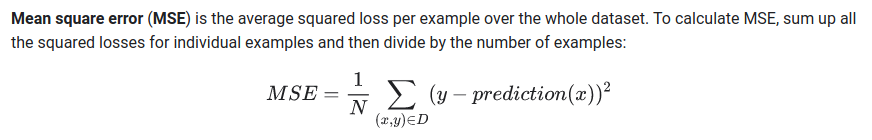



$y$       - predicted network output value  
$\hat{y}$ - true value  

$$\hat{y}=Wx+b$$

$$J=\sum_{i=0}^{C} (y_i-\hat{y_i})^2$$

$$J'=2(y-\hat{y})$$



$J$          - error function  
$l$          - index of a particular layer  
$w_{i,j}$    - weight for the $i$-th neuron $j$-th input (in a layer $l$)  
$\normalsize\nabla_W J$ - nabla_JW  
$\nabla_b J$ - nabla_Jb  

$\odot$  
$\circ$  



$\frac{\partial J}{\partial w_{i,j}}$  
$\nabla_W J=\delta \circ x$  


$\large\delta_i^l = \frac{\partial J}{\partial z_i}$ - how much error $J$ depends on $z_i$. it exists for every neuron $i$ in every layer $l$.


$\large\frac{\partial z_i}{\partial w_{i,j}}=\frac{\partial \sum_{j} w_{i,j}x_j+b_i}{\partial w_{i,j}} = x_j \cdot 1 = x_j \tag{8}$


$\large\frac{\partial z_i}{\partial b_{i}}=\frac{\partial \sum_{j} w_{i,j}x_j+b_i}{\partial b_{i}} = 1 \tag{9}$  




$\large\frac{\partial y_i}{\partial z_i} = f'(z_i)\frac{\partial z_i}{\partial{z_i}} = f'(z_i) \cdot 1 = f'(z_i) \tag{10}$   
$\large\frac{\partial y_i}{\partial w_{i,j}} = f'(y_i)\frac{\partial z_i}{\partial w_{i,j}} = f'(y_i) x_j \cdot 1 = f'(y_i) x_j \tag{11}$

$\large\frac{\partial y_i}{\partial b_i} = f'(z_i)\frac{\partial z_i}{\partial b_i} = f'(z_i) \cdot 1 = f'(z_i) \tag{12}$




$\large z^{l+1}=W^{l+1}x^{l+1}+b^{l+1} \tag{13}$


$\large \frac{\partial z_i^{l+1}}{\partial z_i} = \frac{\partial \sum_j w_{i,j}^{l+1} x_j^{l+1} + b_i^{l+1}}{\partial z_i} = \frac{\partial \sum_j w_{i,j}^{l+1} f(z_j) + b_i^{l+1}}{\partial z_i} = w_{i,j}^{l+1} f'(z_i) \tag{14}$


In [5]:
import sys
sys.path.append("./py")
import rf_multilayer_dense_numpy as rf_multilayer

# BACKPROP_SINGLE_EXAMPLE
x_input = X_test[0]
y_true  = y_train[0]

rf_multilayer.model__backprop(x_input, y_true, model)


# BACKPROP_ALL_EXAMPLES
for i, x_input in enumerate(X_test):
    y_true = y_train[i]
    rf_multilayer.model__backprop(x_input, y_true, model)

36.102069471120615
[-3.80988951 -3.83068698 -3.74854033 -3.80912424 -3.81797511 -3.81350009
 -3.84556199 -3.77488704 -3.77062491 -3.77920979]
---------------------------
[-0.04480751 -0.16066377  0.23486968 -0.04079021 -0.0882695  -0.06398221
 -0.25262017  0.12418937  0.14294569  0.10480002]
[0.08601975 0.07748978 0.10992184 0.08632949 0.08272918 0.0845544
 0.07125623 0.09988752 0.10153431 0.09820802]
---------------------------
delta - [-0.32772573 -0.29683911 -0.41204646 -0.32883975 -0.31585795 -0.32244821
 -0.27402025 -0.3770641  -0.38284781 -0.37114873]


ValueError: operands could not be broadcast together with shapes (10,20) (10,64) 